<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:purple;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        IMPORTING LIBRARIES
    </h3>
    </div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import LocalOutlierFactor
import numpy as np  
import pandas as pd 
from numpy import ma
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import ticker, cm
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score, confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 

from keras import layers
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding
from keras.utils import np_utils, to_categorical
from keras.datasets import imdb
#from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.optimizers import Adam

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import pandas_profiling

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:purple;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        IMPORTING DATA
    </h3>
    </div>

In [2]:
data= pd.read_csv('/kaggle/input/automobile-dataset/Automobile.csv')

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:purple;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        EDA
    </h3>
    </div>

In [3]:
data.head(10)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
5,ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,usa
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,usa
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,usa
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,usa
9,amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,70,usa


In [4]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
data.shape

(398, 9)

In [7]:
data.dtypes

name             object
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
dtype: object

In [8]:
data.columns

Index(['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [9]:
data.describe

<bound method NDFrame.describe of                           name   mpg  cylinders  displacement  horsepower  \
0    chevrolet chevelle malibu  18.0          8         307.0       130.0   
1            buick skylark 320  15.0          8         350.0       165.0   
2           plymouth satellite  18.0          8         318.0       150.0   
3                amc rebel sst  16.0          8         304.0       150.0   
4                  ford torino  17.0          8         302.0       140.0   
..                         ...   ...        ...           ...         ...   
393            ford mustang gl  27.0          4         140.0        86.0   
394                  vw pickup  44.0          4          97.0        52.0   
395              dodge rampage  32.0          4         135.0        84.0   
396                ford ranger  28.0          4         120.0        79.0   
397                 chevy s-10  31.0          4         119.0        82.0   

     weight  acceleration  model_year  or

In [10]:
data.isnull().any()

name            False
mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
dtype: bool

In [11]:
data.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [12]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


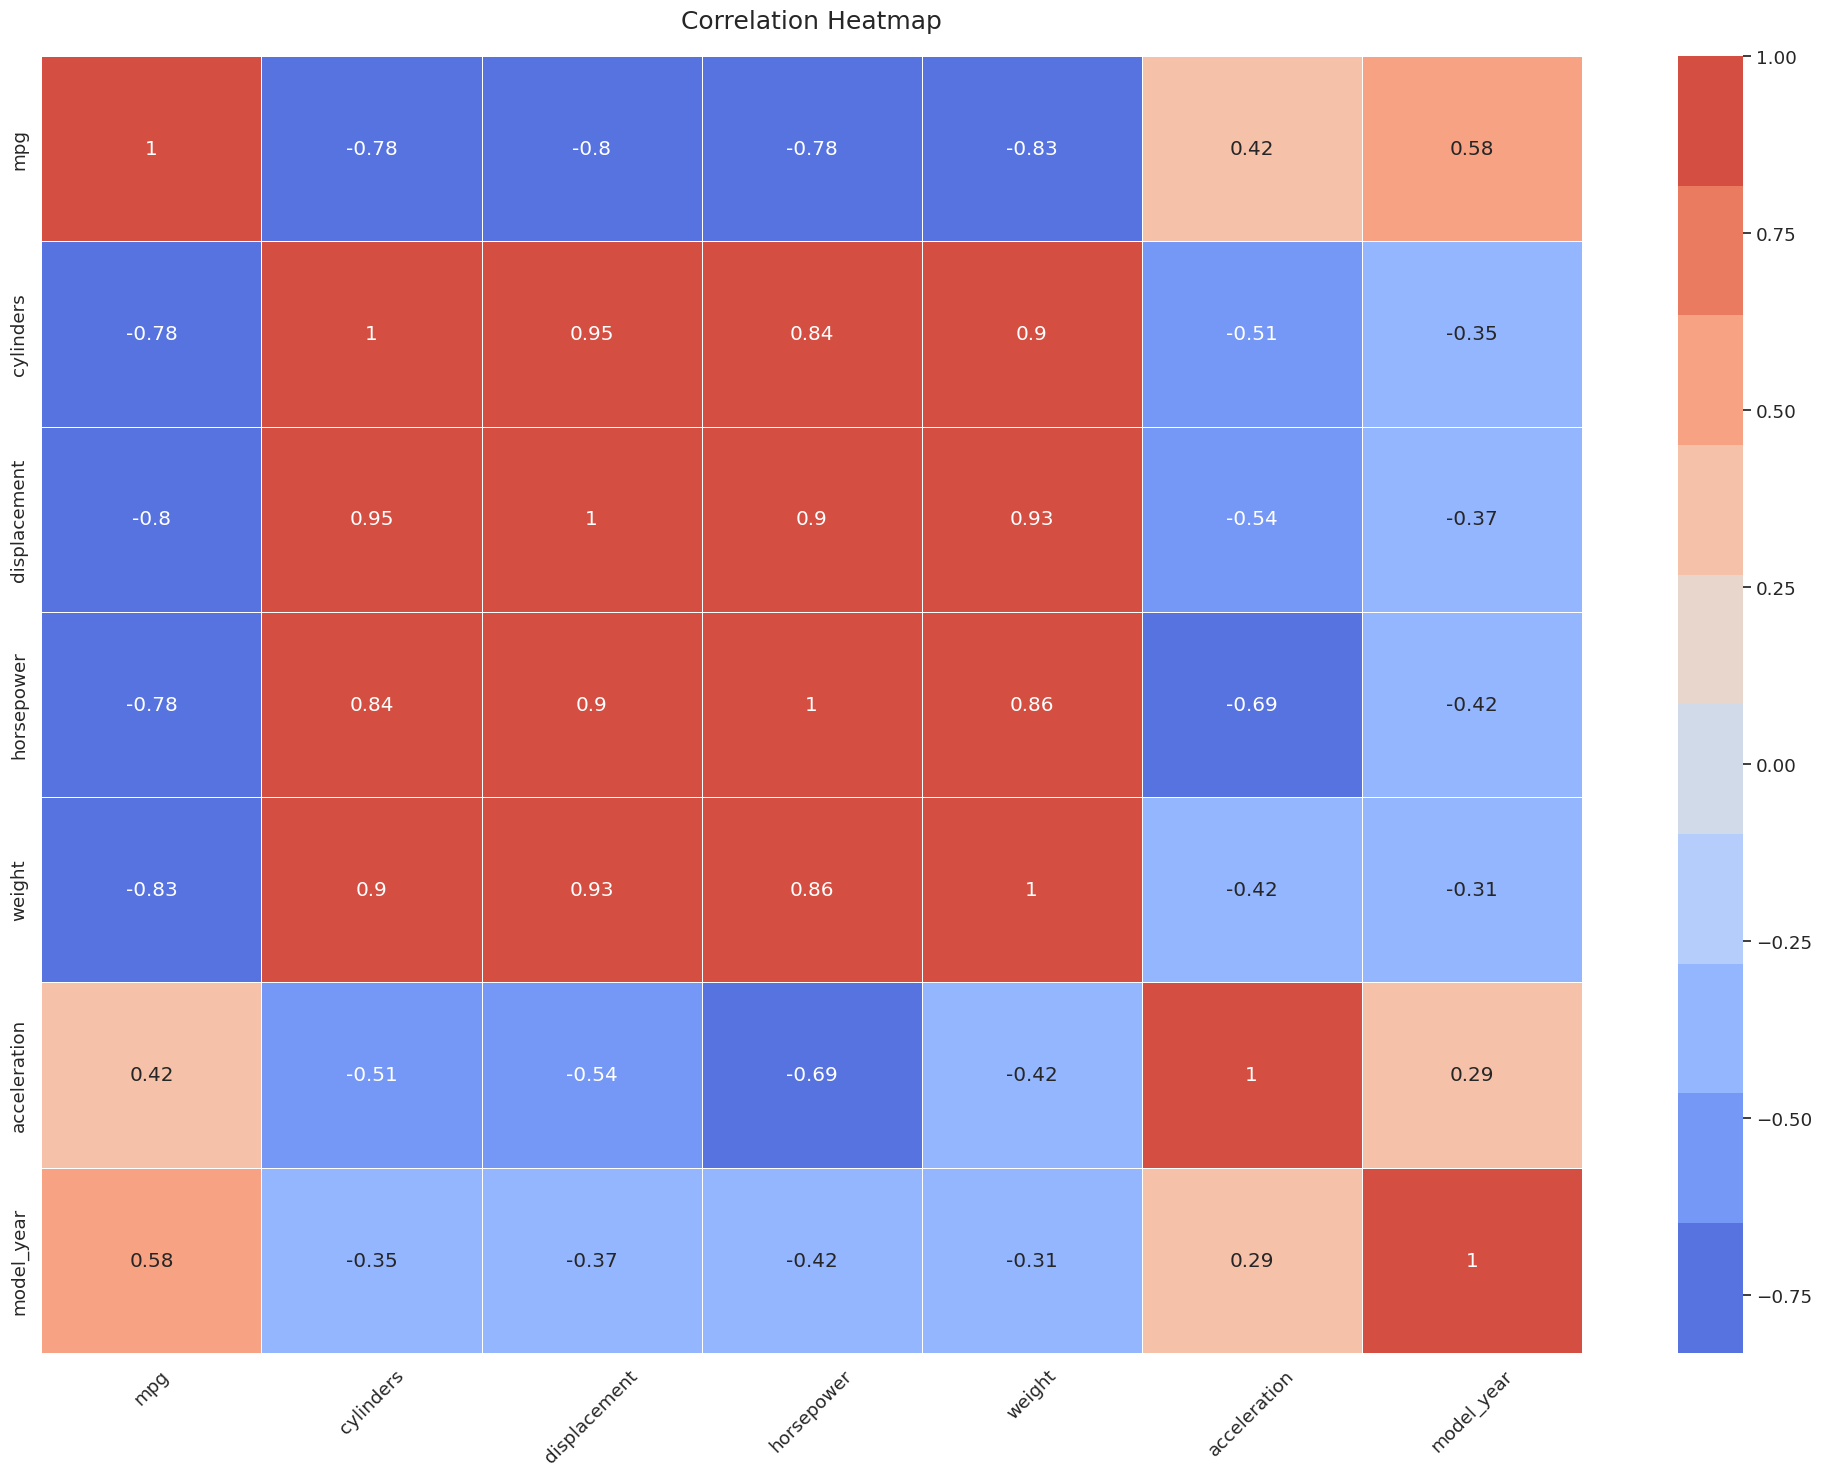

In [13]:
corr_matrix = data.corr()
color_palette = sns.color_palette("coolwarm", 10)
plt.figure(figsize=(20, 15))
sns.set(font_scale=1.2) 
sns.heatmap(corr_matrix, annot=True, cmap=color_palette, linewidths=0.5, linecolor='white')
plt.title("Correlation Heatmap", fontsize=18, pad=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


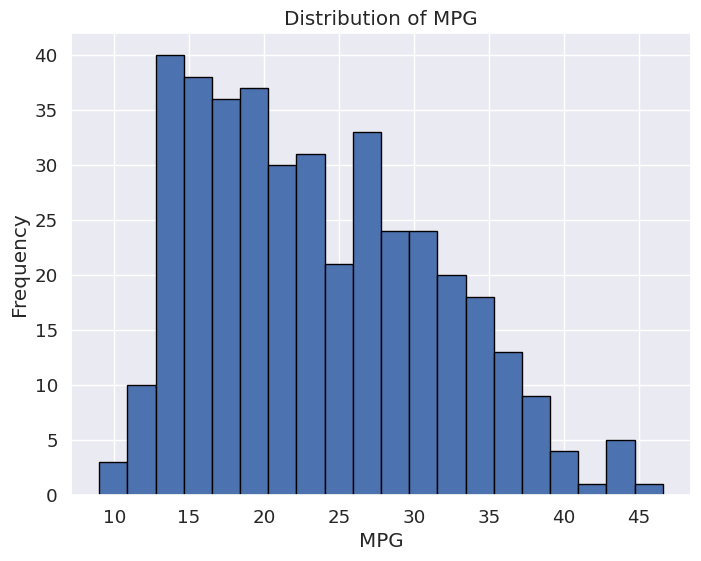

In [14]:
# Histogram of MPG: This plot will show the distribution of fuel efficiency values.
plt.figure(figsize=(8, 6))
plt.hist(data['mpg'], bins=20, edgecolor='black')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Distribution of MPG')
plt.show()


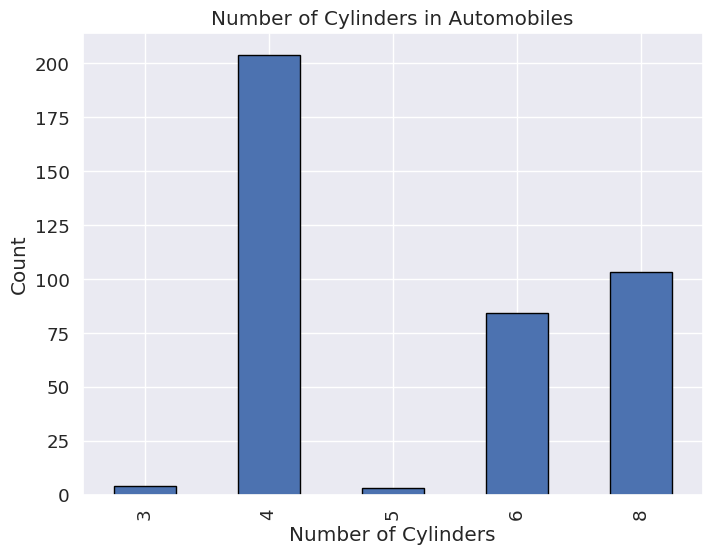

In [15]:
# Bar plot of Cylinders: This plot will display the frequency or count of automobiles for each number of cylinders.
plt.figure(figsize=(8, 6))
data['cylinders'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.xlabel('Number of Cylinders')
plt.ylabel('Count')
plt.title('Number of Cylinders in Automobiles')
plt.show()

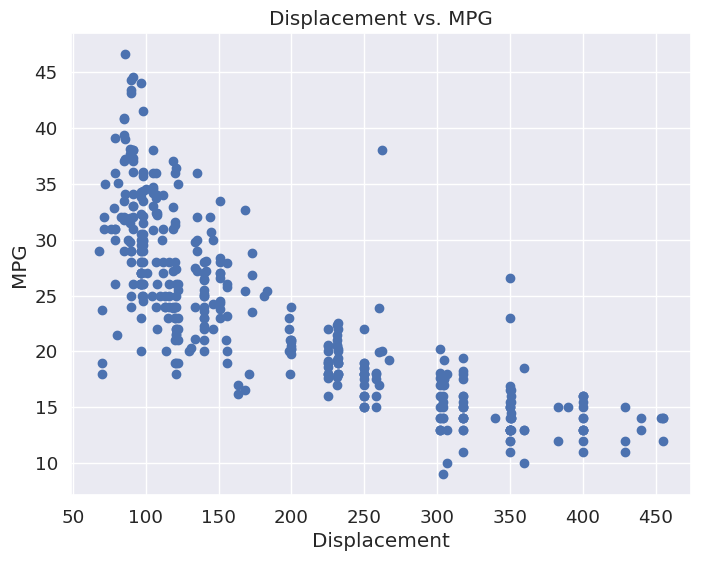

In [16]:
# Scatter plot of Displacement vs. MPG: This plot will help visualize the relationship between engine displacement and fuel efficiency.
plt.figure(figsize=(8, 6))
plt.scatter(data['displacement'], data['mpg'])
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.title('Displacement vs. MPG')
plt.show()

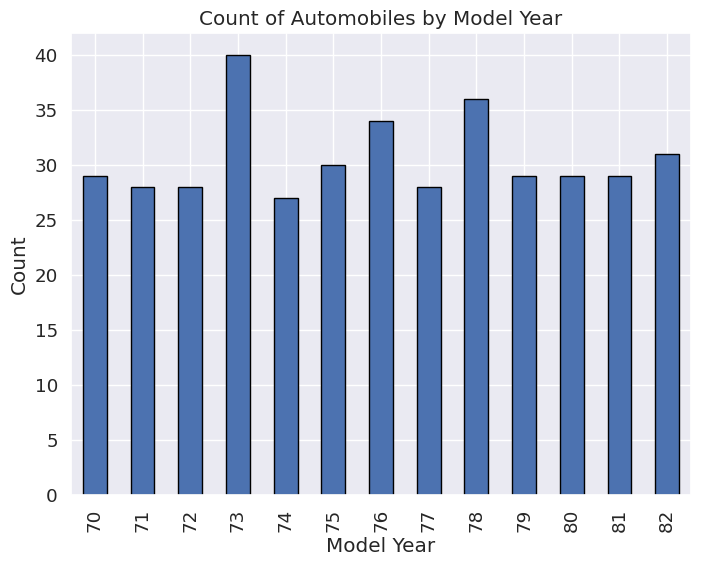

In [17]:
# Bar plot of Model Year: This plot will show the count of automobiles for each year of manufacture.
plt.figure(figsize=(8, 6))
data['model_year'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.title('Count of Automobiles by Model Year')
plt.show()

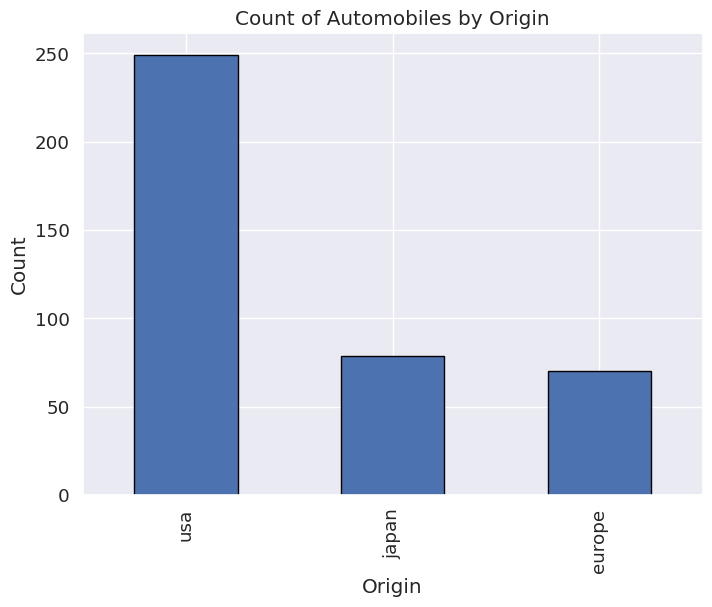

In [18]:
# Bar plot of Origin: This plot will display the count of automobiles for each country or region of origin.
plt.figure(figsize=(8, 6))
data['origin'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.title('Count of Automobiles by Origin')
plt.show()

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:purple;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        Thanks for reading my Notebook😁✌️
    </h3>
    </div>